In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [48]:
import numpy as np

In [2]:
IMAGE_SIZE =256
BATCH_SIZE = 256


In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
        "PlantVillage",
        shuffle = True,
        image_size = (IMAGE_SIZE,IMAGE_SIZE),
        batch_size = BATCH_SIZE)

Found 20638 files belonging to 15 classes.


In [4]:
Classes = dataset.class_names
Classes

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)

81

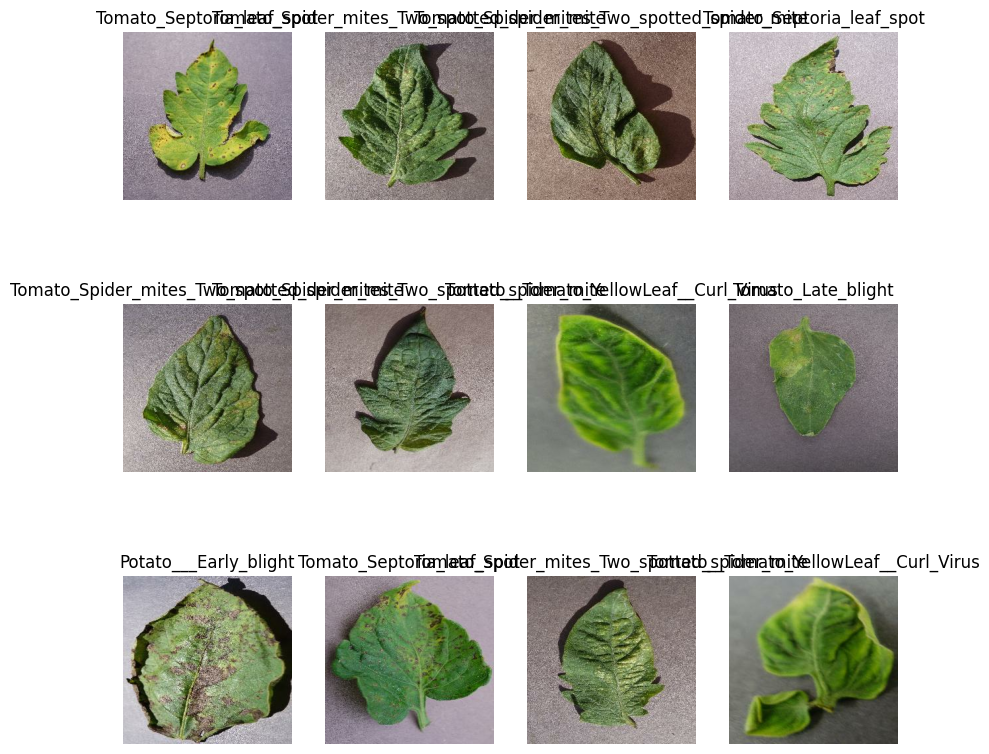

In [6]:
a = dataset.take(1)
plt.figure(figsize = (10,10))
for image_batch,label_batch in dataset.take(1) : 
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(Classes[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)*0.8

64.8

In [8]:
train_ds = dataset.take(64)
len(train_ds)

64

In [9]:
temp_ds = dataset.skip(64)

In [10]:
len(temp_ds)

17

In [11]:
val_ds = temp_ds.take(8)
len(val_ds)

8

In [12]:
test_ds = temp_ds.skip(8)
len(test_ds)

9

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [14]:
resize = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE ,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [15]:
data_aug = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

In [16]:
imp = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
model = tf.keras.models.Sequential([
    resize,
    data_aug,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = imp),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu',input_shape = imp),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu',input_shape = imp),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(15,activation = 'softmax'),
])
model.build(input_shape = imp)

C:\Users\hs298\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics = ['accuracy']
)

In [18]:
model.fit(train_ds,epochs = 30,batch_size =BATCH_SIZE,verbose = 1,validation_data = val_ds)

Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 577s 8s/step - accuracy: 0.1744 - loss: 2.7508 - val_accuracy: 0.4009 - val_loss: 1.8208
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 527s 8s/step - accuracy: 0.4709 - loss: 1.6854 - val_accuracy: 0.4907 - val_loss: 1.6510
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 645s 10s/step - accuracy: 0.6274 - loss: 1.1417 - val_accuracy: 0.4932 - val_loss: 2.1555
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 652s 10s/step - accuracy: 0.7030 - loss: 0.9149 - val_accuracy: 0.6377 - val_loss: 1.3128
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 6369s 101s/step - accuracy: 0.7460 - loss: 0.7601 - val_accuracy: 0.6445 - val_loss: 1.3169
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 534s 8s/step - accuracy: 0.7834 - loss: 0.6512 - val_accuracy: 0.5522 - val_loss: 1.7113
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 538s 8s/step - accuracy: 0.7937 - loss: 0.6196 - val_accuracy: 0.6406 - val_loss: 1.3812
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 534s 8s/step - accuracy: 0.8044 - loss: 0.5797 - val_accuracy: 0.718

In [19]:
scores = model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7839 - loss: 1.0216


In [20]:
model.save("model.h5")

In [23]:
history = _


In [24]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [28]:
acc = history.history['accuracy']
los = history.history['loss']
v_acc = history.history['val_accuracy']
v_los = history.history['val_loss']

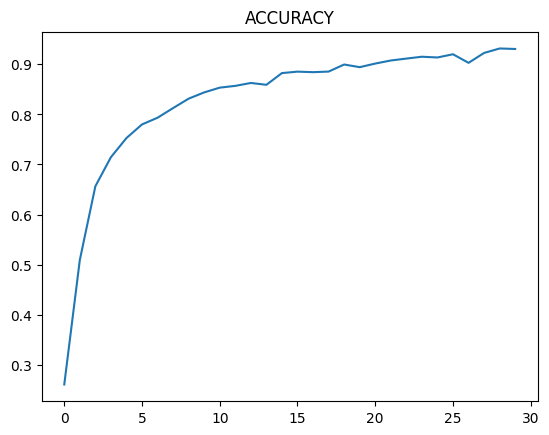

In [34]:
plt.title("ACCURACY")
plt.plot(acc)
plt.show()

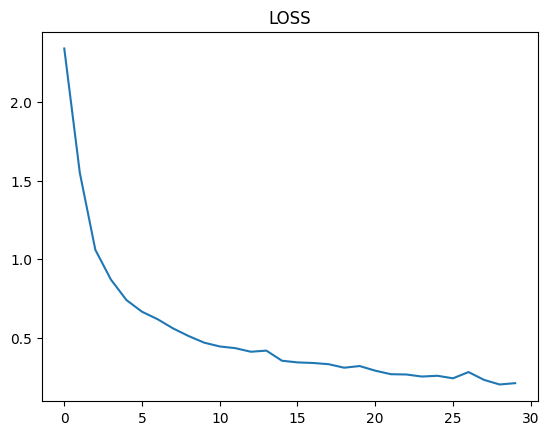

In [33]:
plt.title("LOSS")
plt.plot(los)
plt.show()

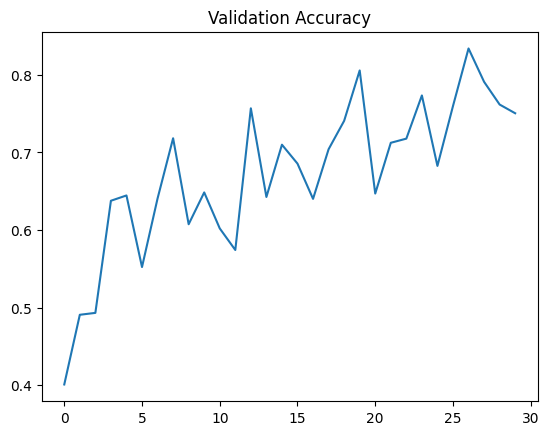

In [35]:
plt.title("Validation Accuracy")
plt.plot(v_acc)
plt.show()

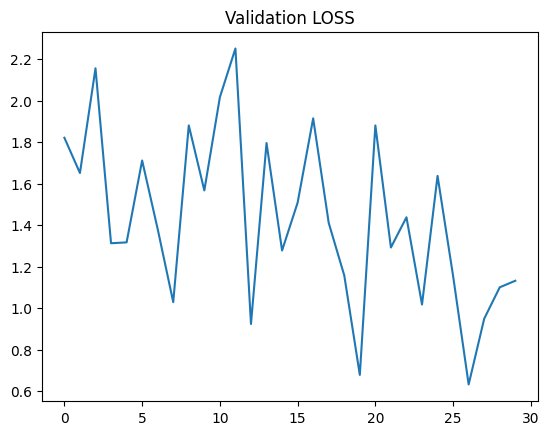

In [36]:
plt.title("Validation LOSS")
plt.plot(v_los)
plt.show()

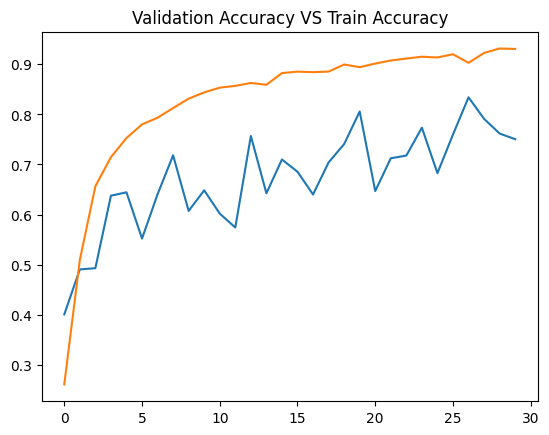

In [37]:
plt.title("Validation Accuracy VS Train Accuracy")
plt.plot(v_acc)
plt.plot(acc)
plt.show()

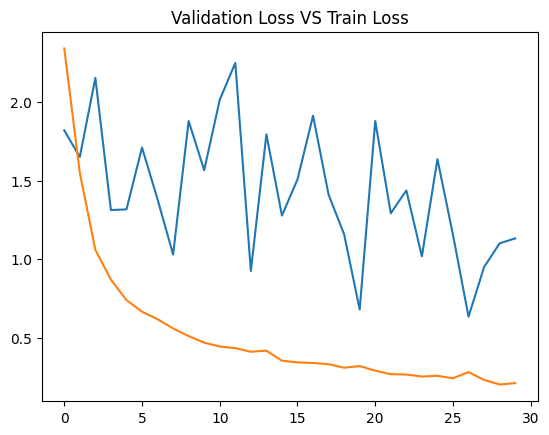

In [39]:
plt.title("Validation Loss VS Train Loss")
plt.plot(v_los)
plt.plot(los)
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step
predicted Tomato_Early_blight
actual label Tomato_Early_blight
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
predicted Potato___Early_blight
actual label Tomato_Late_blight
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
predicted Tomato__Tomato_YellowLeaf__Curl_Virus
actual label Tomato__Tomato_YellowLeaf__Curl_Virus
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step
predicted Potato___Early_blight
actual label Potato___Early_blight
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
predicted Tomato_Septoria_leaf_spot
actual label Tomato_Leaf_Mold


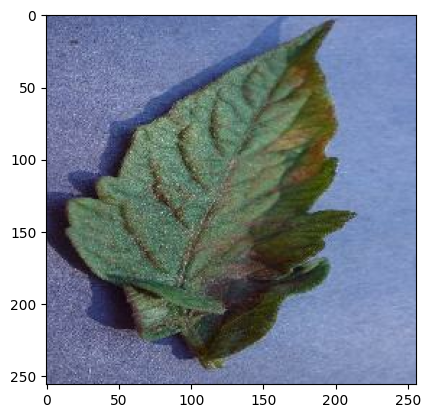

In [59]:
for image_batch, labels_batch in test_ds.take(5):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    plt.imshow(first_image)
    batch_prediction = model.predict(image_batch)
    x = np.argmax(batch_prediction[0])
    print('predicted',Classes[x])
    print('actual label' , Classes[first_label])

'Tomato__Target_Spot'